## Файл с 1й моделью  
Данный файл содержит обученную на наших данных модель SVM классификатора и соответствующие ей метрики

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,auc,precision_recall_curve,f1_score
from sklearn.svm import LinearSVC
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

In [2]:
with open('./files/train_data.pkl', 'rb') as f:
    loaded_train_data = pickle.load(f)

# Загрузка тестовых данных
with open('./files/test_data.pkl', 'rb') as f:
    loaded_test_data = pickle.load(f)

# Извлечение признаков и меток
X_train = loaded_train_data['features']
y_train = loaded_train_data['labels']

X_test = loaded_test_data['features']
y_test = loaded_test_data['labels']

X = np.concatenate((X_train,X_test),axis = 0)
y = np.concatenate((y_train,y_test), axis = 0)

Проведем кросс-валидацию, для того чтобы посмотреть качество обучения нашей модели (не происходит ли переобучения)

In [4]:
# Линейный SVM классификатор
model = LinearSVC(C=1, max_iter = 1000)

In [5]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Выполнение кросс-валидации
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Вывод результатов
print(f'Accuracy per fold: {scores}')
print(f'Average accuracy: {np.mean(scores)}')

Accuracy per fold: [0.88544 0.88512 0.88384 0.8856 ]
Average accuracy: 0.885


Как мы можем заметить, по результатам кросс-валидации на всех 4х блоках наша модель показывает результат более 0.88 по метрике точность.  
Переобучения не происходит

In [6]:
# Линейный SVM классификатор
model = LinearSVC(C=1, max_iter = 1000)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_score = model.decision_function(X_test)

In [7]:
# F1 мера
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Отчет по классификации
print('Classification Report:')
print(classification_report(y_test, y_pred))

F1 Score: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.89      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



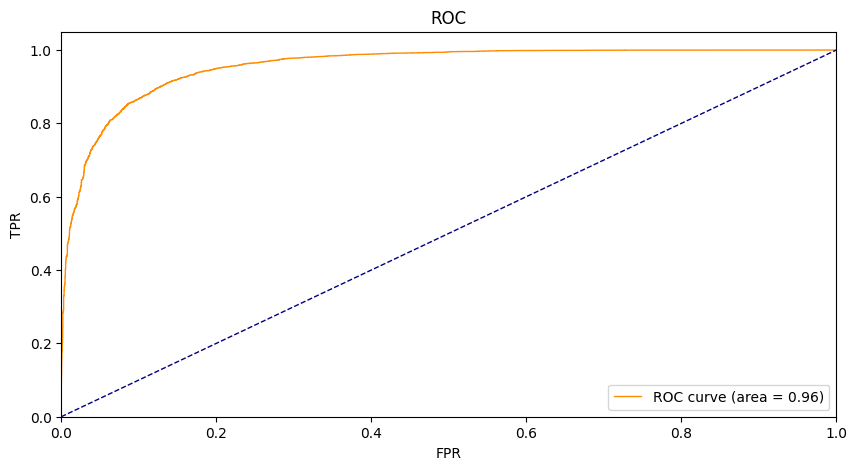

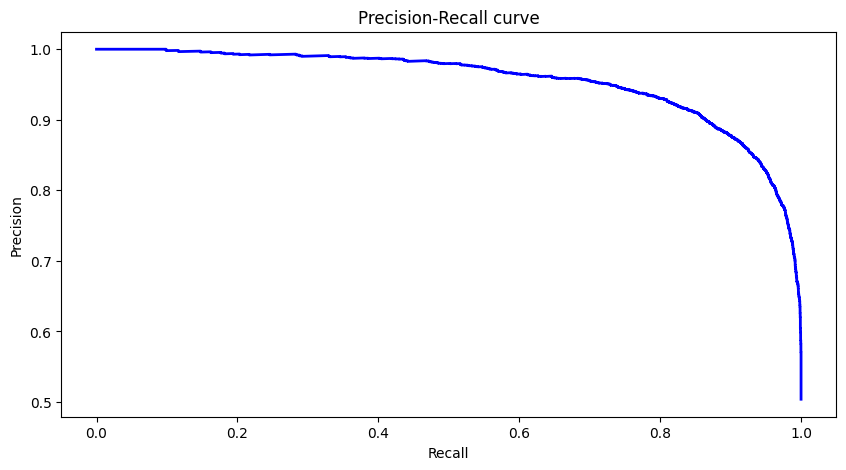

In [8]:
# ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.figure(figsize=(10, 5))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

Наша модель показывает очень хорошие результаты, если оценивать ее на тех метриках, которые представленны выше.